In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## Tabular Data

In [205]:
df = pd.read_csv("D:\Arjun 2\Coding Files-Arjun\Computer Science\College\IntroToML\M2\Datasets_LDA\IRIS\Iris.csv")
df.drop('Id', inplace=True, axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [206]:
# EDA
print(df.shape)
print(df.columns)
df['Species'].value_counts()  # Target variable count (n-1) = n_components

(150, 5)
Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [207]:
# Preprocess the dataset and divide into train and test
le = LabelEncoder()
df= df.apply(le.fit_transform)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0
3,3,10,5,1,0
4,7,15,4,1,0
...,...,...,...,...,...
145,24,9,28,19,2
146,20,4,26,15,2
147,22,9,28,16,2
148,19,13,30,19,2


In [208]:
X = df.drop(['Species'], axis=1)
y = df['Species']

X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,8,14,4,1
1,6,9,4,1
2,4,11,3,1
3,3,10,5,1
4,7,15,4,1
...,...,...,...,...
145,24,9,28,19
146,20,4,26,15
147,22,9,28,16
148,19,13,30,19


In [209]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [210]:
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-9.06512431e-01,  1.04063684e+00, -1.22310820e+00,
        -1.25097727e+00],
       [-1.15195804e+00, -1.25996388e-01, -1.22310820e+00,
        -1.25097727e+00],
       [-1.39740364e+00,  3.40656901e-01, -1.30924258e+00,
        -1.25097727e+00],
       [-1.52012644e+00,  1.07330257e-01, -1.13697382e+00,
        -1.25097727e+00],
       [-1.02923523e+00,  1.27396348e+00, -1.22310820e+00,
        -1.25097727e+00],
       [-5.38344025e-01,  1.97394341e+00, -9.64705059e-01,
        -9.37710841e-01],
       [-1.52012644e+00,  8.07310191e-01, -1.22310820e+00,
        -1.09434406e+00],
       [-1.02923523e+00,  8.07310191e-01, -1.13697382e+00,
        -1.25097727e+00],
       [-1.76557205e+00, -3.59323033e-01, -1.22310820e+00,
        -1.25097727e+00],
       [-1.15195804e+00,  1.07330257e-01, -1.13697382e+00,
        -1.40761048e+00],
       [-5.38344025e-01,  1.50729012e+00, -1.13697382e+00,
        -1.25097727e+00],
       [-1.27468084e+00,  8.07310191e-01, -1.05083944e+00,
      

In [211]:
# Split into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [212]:
# Model Building
LDA = lda(n_components =2)
LDA.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=2)

In [213]:
z = LDA.transform(X_train)

In [214]:
y_pred = LDA.predict(X_test)
y_pred

array([1, 1, 0, 1, 2, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 2, 2, 1, 1, 1, 0, 0])

In [215]:
accuracy_score(y_test ,y_pred)

1.0

In [216]:
confusion_matrix(y_test ,y_pred)


array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  0,  8]], dtype=int64)

## Image Data

In [217]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt 

In [218]:
folder1 = r"D:\Arjun 2\Coding Files-Arjun\Computer Science\College\IntroToML\img\Spectacles\spectacles_on"
folder2 = r"D:\Arjun 2\Coding Files-Arjun\Computer Science\College\IntroToML\img\Spectacles\spectacles_off"

def load_img(folder):
    imgs=[]
    y_label=[]
    for i in os.listdir(folder):
        img=cv2.imread(os.path.join(folder,i))
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img=cv2.resize(img,(256,256))
        imgs.append(img)

        if folder==r"D:\Arjun 2\Coding Files-Arjun\Computer Science\College\IntroToML\img\Spectacles\spectacles_on":
            y_label.append(0)
        elif folder==r"D:\Arjun 2\Coding Files-Arjun\Computer Science\College\IntroToML\img\Spectacles\spectacles_off":
            y_label.append(1)
            
    return imgs,y_label

In [219]:
def to_array(folder):
    arrays,y_label=load_img(folder)

    arrays=np.array(arrays).reshape(-1,256*256)
    y_label=np.array(y_label).reshape(-1,1)

    print(arrays.shape,y_label.shape)
    return arrays,y_label

In [220]:
x1,y1=to_array(folder1)
x2,y2=to_array(folder2)

(8, 65536) (8, 1)
(8, 65536) (8, 1)


In [221]:
X=np.concatenate((x1,x2))
Y=np.concatenate((y1,y2))
# print(X.shape,Y.shape)

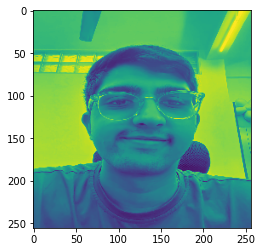

In [222]:
arrays,y_label=load_img(folder1)
plt.imshow(arrays[0])

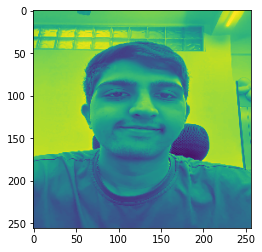

In [223]:
arrays,y_label=load_img(folder2)
plt.imshow(arrays[0])

In [224]:
# Standardize X
sc1 = StandardScaler()
X = sc1.fit_transform(X)

In [225]:
# Split into train test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [226]:
LDA1 =lda(n_components=1)
LDA1.fit(X_train,y_train)
zscore=LDA1.transform(X_train)

C:\Users\arjd2\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [227]:
y_pred=LDA1.predict(X_test)
y_pred

array([0, 0, 1, 1])

In [228]:
accuracy_score(y_test,y_pred)

0.75

In [229]:
confusion_matrix(y_test,y_pred)


array([[1, 0],
       [1, 2]], dtype=int64)